## Example of extracting the lever arm and the charging energy from bias triangles and addition lines

Authors: Anne-Marije Zwerver and Pieter Eendebak

Import the modules used in this program:

In [1]:
%matplotlib notebook
import os, sys
import qcodes
import qtt
import matplotlib.pyplot as plt
import numpy as np

from qcodes import MatPlot
from qtt.data import diffDataset
from qtt.algorithms.bias_triangles import perpLineIntersect, lever_arm, E_charging

### Load datasets

In [2]:
exampledatadir=os.path.join(qtt.__path__[0],'..', 'examples', 'data')
qcodes.DataSet.default_io = qcodes.DiskIO(exampledatadir)
dataset_la = qcodes.load_data(r'D:\users\amjzwerver\qtt\docs\notebooks\data\Lever_arm_Charging_energy\14-33-26_qtt_scan2Dfast')
dataset_Ec = qcodes.load_data(r'D:\users\amjzwerver\qtt\docs\notebooks\data\Lever_arm_Charging_energy\10-06-59_qtt_scan2Dfast')

Plot the bias triangles (to extract the lever arm)

<IPython.core.display.Javascript object>


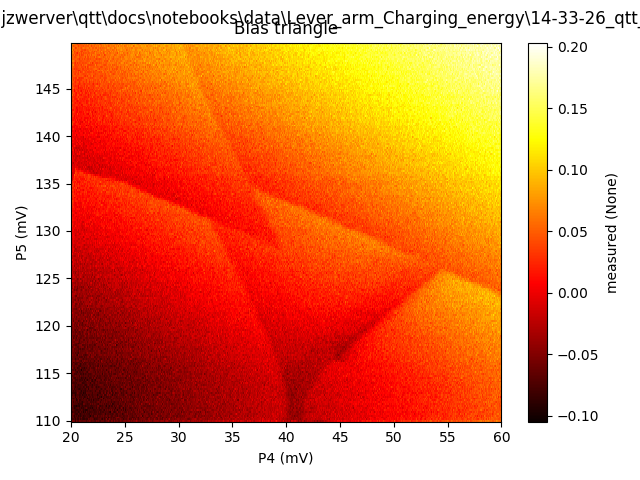

In [3]:
plt.figure(1); plt.clf()
MatPlot([dataset_la.measured], num = 1)
ax = plt.gca()
ax.set_title('Bias triangle') 
ax.set_xlabel('%s (mV)' %ax.get_xlabel()[:2])
ax.set_ylabel('%s (mV)' %ax.get_ylabel()[:2])

Plot the addition lines (to extraxt the charging energy)

<IPython.core.display.Javascript object>


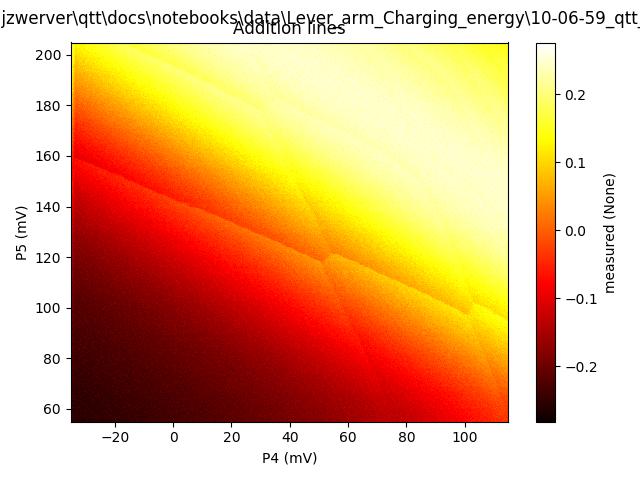

In [4]:
plt.figure(3); plt.clf()
MatPlot([dataset_Ec.measured], num = 3)
ax = plt.gca()
ax.set_title('Addition lines') 
ax.set_xlabel('%s (mV)' %ax.get_xlabel()[:2])
ax.set_ylabel('%s (mV)' %ax.get_ylabel()[:2])

### Extract lever arm from the bias triangles

First, click three points on the figure. Point 1 and 2 along the addition line for the dot of which you want to determine the lever arm, the third point on the triple point where both dot levels are aligned. The perpLineIntersect function will return a dictionary containing the coordinates of these three points, the intersection point of a horizontal/vertical line of the third point with the (extended) line through point 1 and 2 and the line length from the third point to the intersection.

If you want to determine the lever arm for dot 4, take the horizontal line (vertical = False),
if you want to determine the lever arm for dot 5, take the vertical line (vertical = True).

<IPython.core.display.Javascript object>


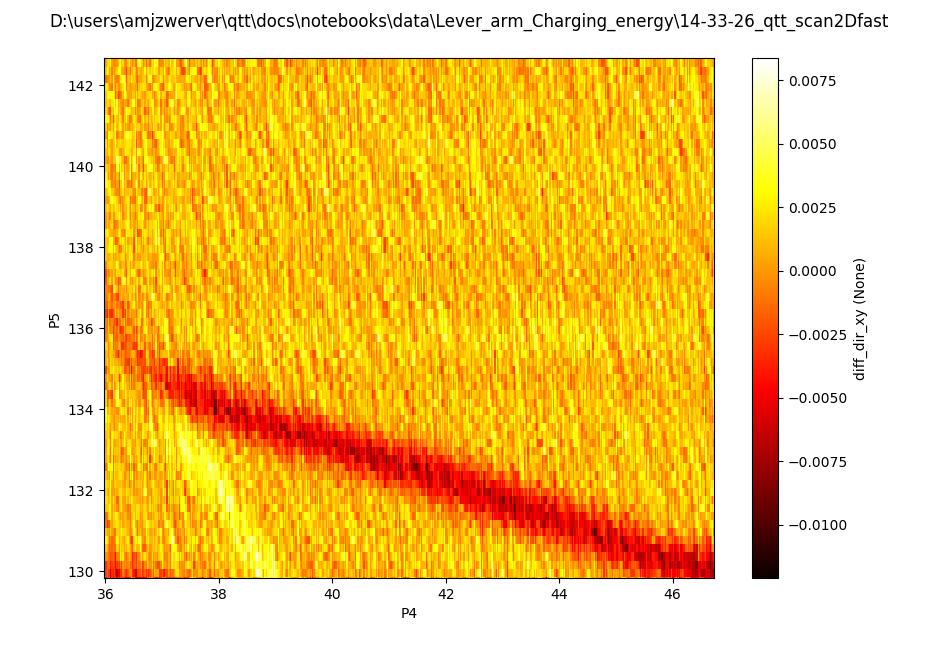

Please click three points;
            Point 1: on the addition line for the dot represented on the horizontal axis
            Point 2: further on the addition line for the dot represented on the horizontal axis
            Point 3: on the triple point at the addition line for the dot represented on the horizontal axis
            where both dot levels are aligned


C:\Users\TUD278090\AppData\Local\Continuum\Anaconda3\envs\amjzwerver\lib\site-packages\matplotlib\backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 52))



NotImplementedError: 

In [6]:
import matplotlib.animation
dot = 'P4'

if dot == 'P4':
    vertical = False
elif dot == 'P5':
    vertical = True
else:
    print("Please choose either dot 4 or dot 5")

la_fit = perpLineIntersect(dataset_la, vertical = vertical, description = 'lever_arm')

Determine the lever arm ($\mu$V/mV) by dividing the applied bias for the bias triangles by the voltage span determined by la_fit

In [31]:
bias = dataset_la.snapshot()['allgatevalues']['O5']
lev_arm = lever_arm(bias, la_fit, fig = True)

NameError: name 'la_fit' is not defined

### Extract addition energy

Again, use the function perpLineIntersect, this time to obtain the charging energy (in mV). By means of the lever arm, the chagring energy can be expressed in meV

In [ ]:
Ec_fit = perpLineIntersect(dataset_Ec, description = 'E_charging', vertical = vertical)

In [ ]:
E_c = E_charging(lev_arm, results = ll, fig = True)